# 42. 欠損値の扱い・データクリーニング

In [2]:
import numpy as np

In [2]:
# 欠損値のあるデータ
!cat './data/2D_example_dame.csv'

1,-7.428476,1.509903
0,2.980693,1.960821
0,3.988255,4.636389
1,-5.789437,-4.621614
1,-4.894447,-326.9730
1,-1.933949,-0.047276
0,-1.611771,5.932201
1,-6.670152,-1.036282
1,-293.1415,-0.104475
0,-0.074762,1.070002
1,-2.691793,4.168774
0,0.461182,3.453438
0,-1.354135,3.751657
1,-6.229476,-1.209434
0,2.778594,NaN
1,-5.719578,-0.243509
0,0.928322,3.208520
0,0.850475,2.908955
1,NaN,-1.831199
0,1.116025,3.353602


In [3]:
data = np.loadtxt('./data/2D_example_dame.csv', delimiter=",")

In [4]:
y = data[:,0].astype(int)

In [5]:
X = data[:,1:3]

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap(plt.cm.Paired)

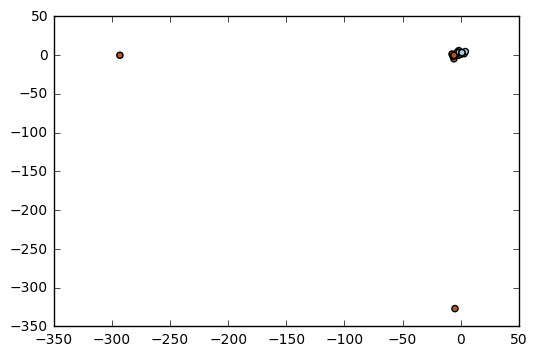

In [7]:
plt.scatter(X[:,0], X[:,1], c=y) # おかしなデータが2点ある！

(-10, 10)

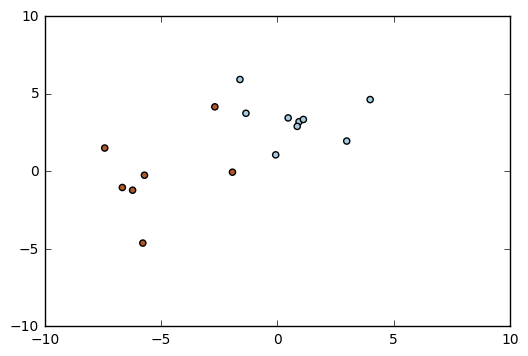

In [8]:
plt.scatter(X[:,0], X[:,1], c=y) # おかしなデータが2点ある！
plt.xlim(-10, 10)
plt.ylim(-10, 10)

In [9]:
# 欠損値／外れ値の除外
~np.isnan(X[:,0])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True], dtype=bool)

In [10]:
~np.isnan(X[:,1])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True], dtype=bool)

In [11]:
notnan_index = ~np.isnan(X[:,0]) & ~np.isnan(X[:,1])

In [12]:
X1 = X[notnan_index]
y1 = y[notnan_index]

In [13]:
X1, X1.shape, X.shape

(array([[ -7.42847600e+00,   1.50990300e+00],
        [  2.98069300e+00,   1.96082100e+00],
        [  3.98825500e+00,   4.63638900e+00],
        [ -5.78943700e+00,  -4.62161400e+00],
        [ -4.89444700e+00,  -3.26973000e+02],
        [ -1.93394900e+00,  -4.72760000e-02],
        [ -1.61177100e+00,   5.93220100e+00],
        [ -6.67015200e+00,  -1.03628200e+00],
        [ -2.93141500e+02,  -1.04475000e-01],
        [ -7.47620000e-02,   1.07000200e+00],
        [ -2.69179300e+00,   4.16877400e+00],
        [  4.61182000e-01,   3.45343800e+00],
        [ -1.35413500e+00,   3.75165700e+00],
        [ -6.22947600e+00,  -1.20943400e+00],
        [ -5.71957800e+00,  -2.43509000e-01],
        [  9.28322000e-01,   3.20852000e+00],
        [  8.50475000e-01,   2.90895500e+00],
        [  1.11602500e+00,   3.35360200e+00]]), (18, 2), (20, 2))

In [14]:
not_hazurechi = (abs(X1[:,0]) < 10) & (abs(X1[:,1]) < 10)

In [15]:
X2 = X1[not_hazurechi]
y2 = y1[not_hazurechi]

In [16]:
X2.shape

(16, 2)

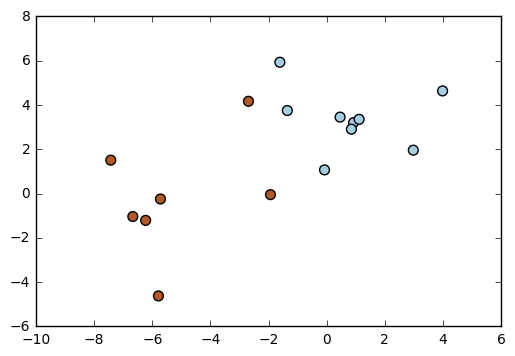

In [17]:
plt.scatter(X2[:,0], X2[:,1], c=y2, s=50)

In [18]:
# NaNを埋める方法

# 1.平均値で埋めてしまう
from sklearn.preprocessing import Imputer

In [19]:
missing_value_to_mean = Imputer()
missing_value_to_mean.fit(X)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [20]:
X_new = missing_value_to_mean.transform(X)
X_new

array([[ -7.42847600e+00,   1.50990300e+00],
       [  2.98069300e+00,   1.96082100e+00],
       [  3.98825500e+00,   4.63638900e+00],
       [ -5.78943700e+00,  -4.62161400e+00],
       [ -4.89444700e+00,  -3.26973000e+02],
       [ -1.93394900e+00,  -4.72760000e-02],
       [ -1.61177100e+00,   5.93220100e+00],
       [ -6.67015200e+00,  -1.03628200e+00],
       [ -2.93141500e+02,  -1.04475000e-01],
       [ -7.47620000e-02,   1.07000200e+00],
       [ -2.69179300e+00,   4.16877400e+00],
       [  4.61182000e-01,   3.45343800e+00],
       [ -1.35413500e+00,   3.75165700e+00],
       [ -6.22947600e+00,  -1.20943400e+00],
       [  2.77859400e+00,  -1.57953962e+01],
       [ -5.71957800e+00,  -2.43509000e-01],
       [  9.28322000e-01,   3.20852000e+00],
       [  8.50475000e-01,   2.90895500e+00],
       [ -1.70755753e+01,  -1.83119900e+00],
       [  1.11602500e+00,   3.35360200e+00]])

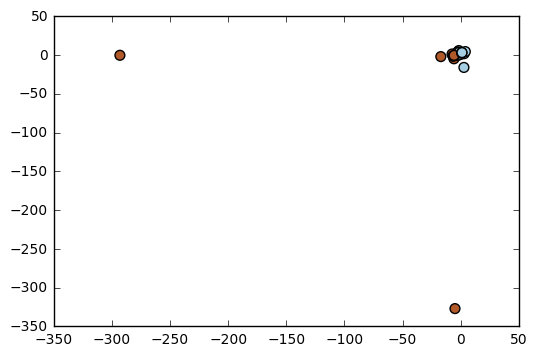

In [21]:
plt.scatter(X_new[:,0], X_new[:,1], c=y, s=50)

# 43. 特徴抽出：テキストデータと特徴量 

In [22]:
import urllib.request
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", "allice.txt")

('allice.txt', <http.client.HTTPMessage at 0x111a9deb8>)

In [23]:
!cat allice.txt

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
txt_vec = CountVectorizer(input='filename')

In [26]:
txt_vec.fit(['allice.txt'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='filename',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [27]:
txt_vec.get_feature_names()[100:120]

['along',
 'aloud',
 'already',
 'also',
 'alteration',
 'altered',
 'alternate',
 'alternately',
 'altogether',
 'always',
 'am',
 'ambition',
 'among',
 'an',
 'ancient',
 'and',
 'anger',
 'angrily',
 'angry',
 'animal']

In [28]:
len(txt_vec.get_feature_names())

3019

In [29]:
alice_vec = txt_vec.transform(['allice.txt'])

In [30]:
alice_vec

<1x3019 sparse matrix of type '<class 'numpy.int64'>'
	with 3019 stored elements in Compressed Sparse Row format>

In [31]:
alice_vec = alice_vec.toarray()

In [32]:
alice_vec[0, 100:120]

array([  6,   5,   3,   4,   1,   1,   1,   1,   5,  13,  16,   1,  12,
        61,   1, 940,   2,   9,   5,   2])

In [33]:
for word, count in zip(txt_vec.get_feature_names()[100:120], alice_vec[0, 100:120]):
    print(word, count)

along 6
aloud 5
already 3
also 4
alteration 1
altered 1
alternate 1
alternately 1
altogether 5
always 13
am 16
ambition 1
among 12
an 61
ancient 1
and 940
anger 2
angrily 9
angry 5
animal 2


以上が特徴量への変換

# 44. 特徴抽出：画像データと特徴量

In [34]:
from sklearn.datasets import load_sample_image

In [35]:
china = load_sample_image('china.jpg')

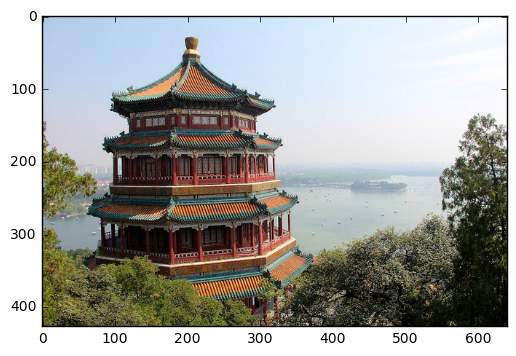

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(china)

In [37]:
china.shape

(427, 640, 3)

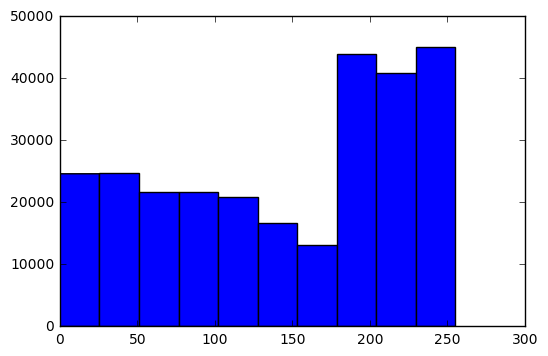

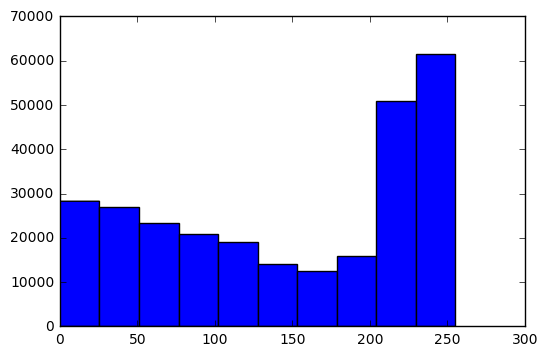

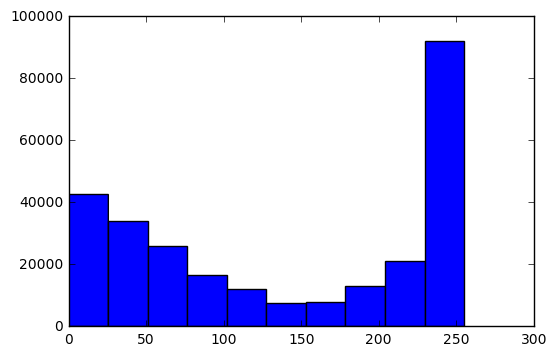

In [38]:
histR = plt.hist(china[:,:,0].ravel(), bins=10)
plt.show()
histG = plt.hist(china[:,:,1].ravel(), bins=10)
plt.show()
histB = plt.hist(china[:,:,2].ravel(), bins=10)
plt.show()

In [39]:
import numpy as np

histRGBcat = np.hstack((histR[0], histG[0], histB[0]))

<Container object of 30 artists>

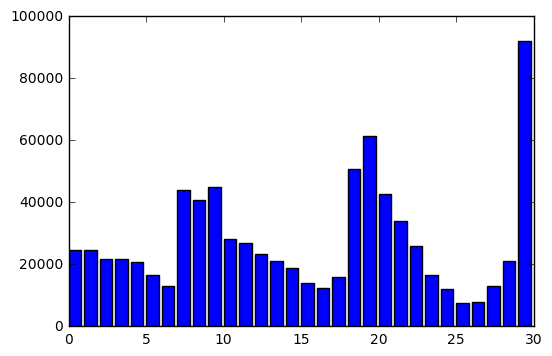

In [40]:
# これが画像の特徴量にできる(といってもこれではうまくいかないが)
plt.bar(range(len(histRGBcat)), histRGBcat)

<Container object of 30 artists>

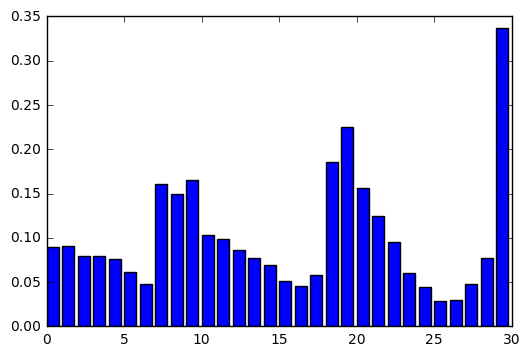

In [41]:
# 画素数（高さ×幅）で割って画像サイズが違っても比較できるようにする
histRGBcat_11 = histRGBcat / (china.shape[0] * china.shape[1])
plt.bar(range(len(histRGBcat_11)), histRGBcat_11)

# 45. 特徴選択

In [42]:
import numpy as np

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [43]:
from sklearn.cross_validation import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [45]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [46]:
# 除外対象
# 考え方：ランダムに近い数値が入っている（傾向が存在しない）／同じ数値しか入っていない

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # カイ二乗基準

In [48]:
skb = SelectKBest(chi2, k=20)

In [49]:
skb.fit(X_train, y_train)

SelectKBest(k=20, score_func=<function chi2 at 0x115b98e18>)

In [50]:
X_train_new = skb.transform(X_train)

In [51]:
X_train.shape, X_train_new.shape

((455, 30), (455, 20))

In [52]:
# どの変数が使われたか？
skb.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False], dtype=bool)

In [53]:
data.feature_names[skb.get_support()]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error',
       'compactness error', 'concavity error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry'], 
      dtype='<U23')

In [54]:
data.feature_names[~skb.get_support()]

array(['mean smoothness', 'mean symmetry', 'mean fractal dimension',
       'texture error', 'smoothness error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst smoothness',
       'worst fractal dimension'], 
      dtype='<U23')

In [55]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [56]:
from sklearn.cross_validation import StratifiedKFold

In [57]:
k_range = np.arange(1, 31)
scores = []
std = []

In [58]:
# 何個の特徴量を選ぶかをfor文で回してやってみる
for k in k_range:
    score = []
    std = []
    
    for train_index, val_index in StratifiedKFold(y_train, 10):
        
        X_train2, X_val = X[train_index], X[val_index]
        y_train2, y_val = y[train_index], y[val_index]
        
        skb = SelectKBest(chi2, k=k)
        
        skb.fit(X_train2, y_train2)
        
        X_new_train2 = skb.transform(X_train2)
        X_new_val = skb.transform(X_val)
        
        clf.fit(X_new_train2, y_train2)
        score.append(clf.score(X_new_val, y_val))
        
    scores.append(np.array(score).mean())
    std.append(np.array(std).std())

scores = np.array(scores)
std = np.array(std)

/Users/ken.nakano/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/ken.nakano/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/ken.nakano/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


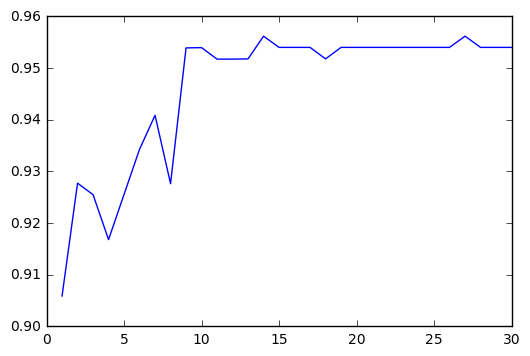

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)

# 46. 特徴変換：PCA

In [60]:
import numpy as np
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [61]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix

In [64]:
df = pd.DataFrame(data.data[:,0:10], columns=data.feature_names[0:10])

In [65]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e5eada0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1210e5940>]], dtype=object)

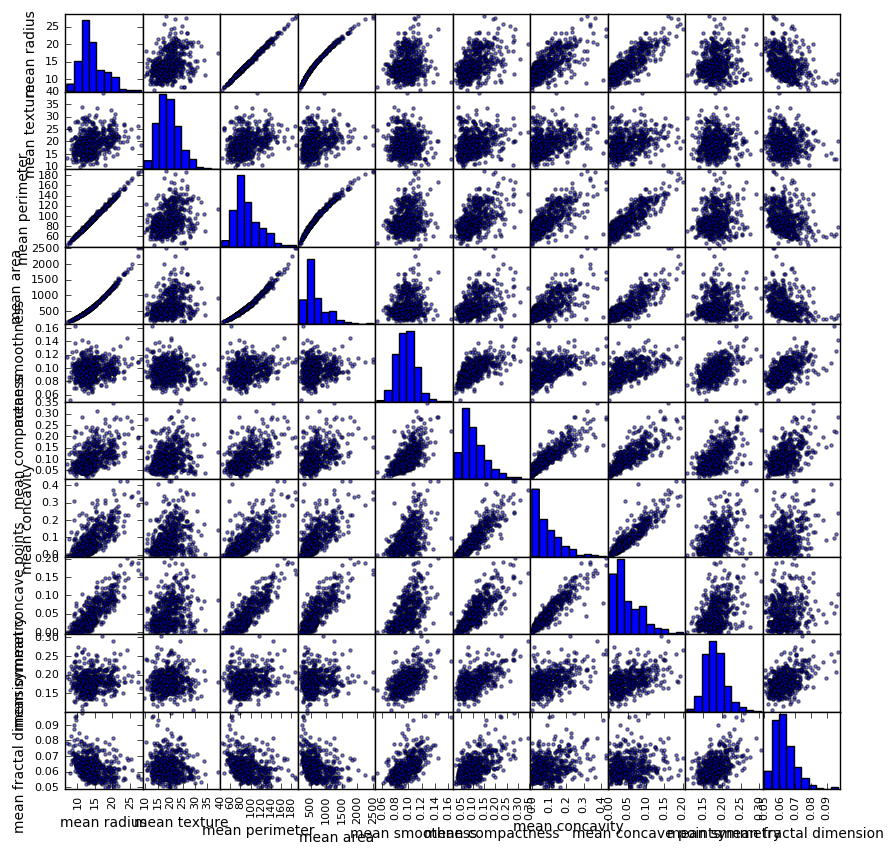

In [66]:
scatter_matrix(df, figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122d7b898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122e3a6a0>]], dtype=object)

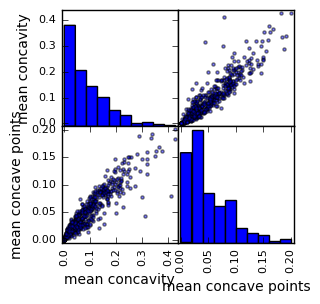

In [67]:
df = pd.DataFrame(data.data[:, 6:8], columns=data.feature_names[6:8])
scatter_matrix(df, figsize=(3,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122e4b358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1154ceb38>]], dtype=object)

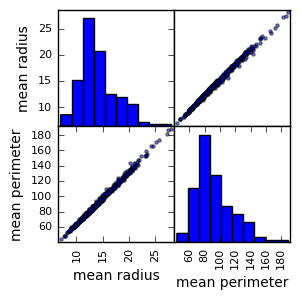

In [68]:
df = pd.DataFrame(data.data[:, [0,2]], columns=data.feature_names[[0,2]]
                )
scatter_matrix(df, figsize=(3,3))

In [69]:
X = data.data[:, [0,2]]
y = data.target
names = data.feature_names[[0,2]]

In [70]:
X.shape, y.shape

((569, 2), (569,))

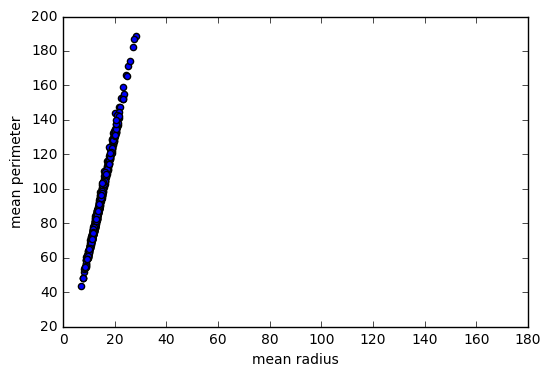

In [71]:
plt.scatter(X[:,0], X[:,1])
plt.xlim(0, 180)
plt.ylim(20, 200)
plt.xlabel(names[0])
plt.ylabel(names[1])

In [72]:
from sklearn.decomposition import PCA

In [73]:
pca = PCA()

In [74]:
pca.fit(X)

PCA(copy=True, n_components=None, whiten=False)

In [75]:
X_new = pca.transform(X)

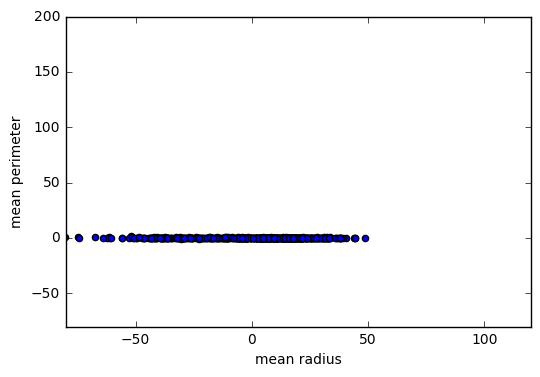

In [76]:
plt.scatter(X_new[:,0], X_new[:,1])
plt.xlim(-80, 120)
plt.ylim(-80, 200)
plt.xlabel(names[0])
plt.ylabel(names[1])

In [77]:
pca.explained_variance_

array([  6.01747863e+02,   5.20297651e-02])

In [78]:
pca.explained_variance_ / pca.explained_variance_.sum()

array([  9.99913543e-01,   8.64569199e-05])

In [79]:
pca.explained_variance_ratio_

array([  9.99913543e-01,   8.64569199e-05])

# 47. 特徴変換：PCAと次元削減

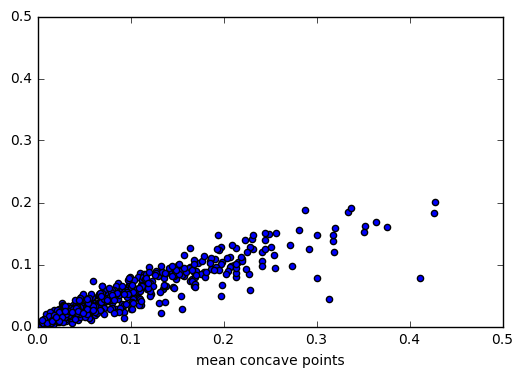

In [80]:
X = data.data[:, [6,7]]
y = data.target
names = data.feature_names[[6,7]]

plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)
plt.xlabel(names[0])
plt.xlabel(names[1])

(-0.25, 0.25)

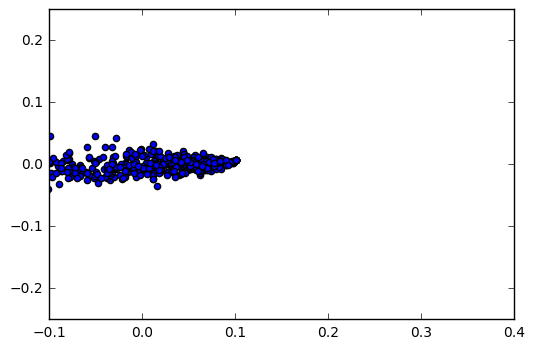

In [81]:
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlim(-0.1, 0.4)
plt.ylim(-0.25, 0.25)

In [82]:
pca.explained_variance_ratio_

array([ 0.97603731,  0.02396269])

In [83]:
# data全体でやる

X = data.data
y = data.target

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [84]:
pca.fit(X_train)

PCA(copy=True, n_components=None, whiten=False)

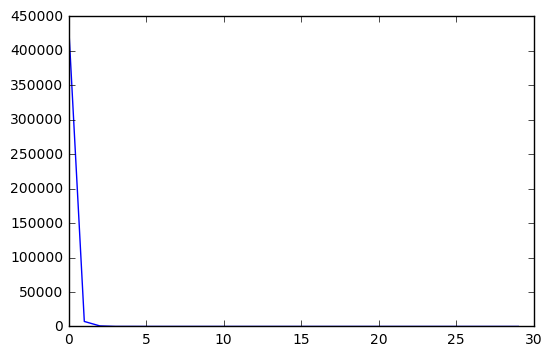

In [85]:
plt.plot(pca.explained_variance_)

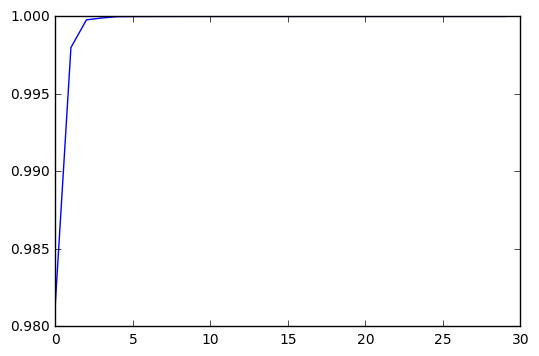

In [86]:
# 3軸でOKということが分かる
plt.plot(np.add.accumulate(pca.explained_variance_ratio_))

In [87]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [88]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [89]:
clf.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
clf.score(X_test_pca, y_test)

0.94736842105263153

In [91]:
clf.fit(X_train_pca[:, 0:3], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
clf.score(X_test_pca[:,0:3], y_test)

0.92105263157894735

In [93]:
score = []
i_range = range(1,31)

for i in i_range:
    
    clf.fit(X_train_pca[:, 0:i], y_train)
    score.append(clf.score(X_test_pca[:, 0:i], y_test))

(0.7, 1)

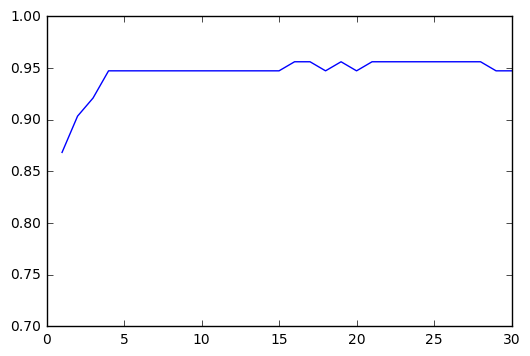

In [94]:
plt.plot(i_range, score)
plt.ylim(0.7, 1)

# 48. 特徴変換：非線形（多項式）変換

In [95]:
from sklearn.preprocessing import PolynomialFeatures

In [96]:
polf = PolynomialFeatures(degree=2)

In [97]:
polf.fit(X_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [98]:
X_train_poly = polf.transform(X_train)
X_test_poly = polf.transform(X_test)

In [99]:
X_train.shape, X_train_poly.shape

((455, 30), (455, 496))

In [100]:
clf.fit(X_train_poly, y_train)
clf.score(X_test_poly, y_test)

0.96491228070175439

In [101]:
# 参考
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.94736842105263153

In [102]:
pca.fit(X_train_poly)

PCA(copy=True, n_components=None, whiten=False)

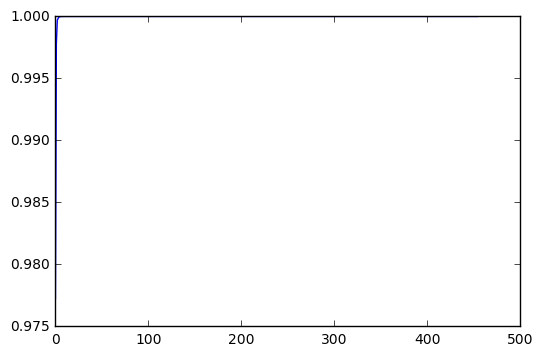

In [103]:
plt.plot(np.add.accumulate(pca.explained_variance_ratio_))

このやり方は、実際にはあまり使われないらしい
非線形にしたい場合は識別器を変える(SVMなど)のがよい

# 49. 標準化

In [104]:
# 平均0 分散1に変換すること
# 標準化をやらないとほとんど性能がでないケースもある
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [105]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
data.feature_names[4], data.feature_names[3]

('mean smoothness', 'mean area')

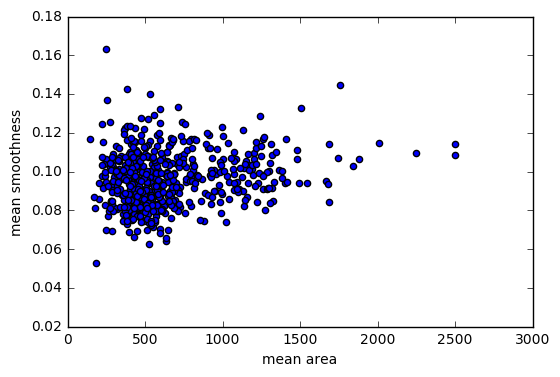

In [108]:
plt.scatter(data.data[:,3], data.data[:,4])
plt.xlabel(data.feature_names[3])
plt.ylabel(data.feature_names[4])

(0, 3000)

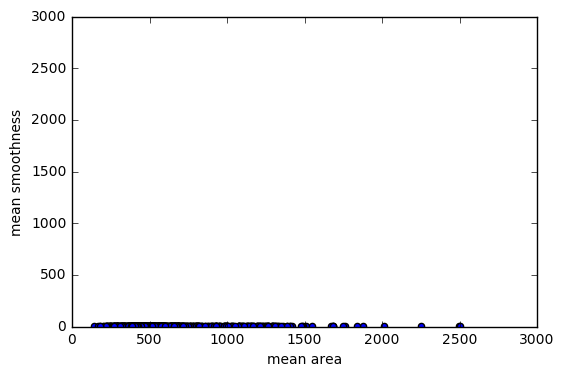

In [109]:
plt.scatter(data.data[:,3], data.data[:,4])
plt.xlabel(data.feature_names[3])
plt.ylabel(data.feature_names[4])
plt.xlim(0, 3000)
plt.ylim(0, 3000)

In [110]:
from sklearn.cross_validation import train_test_split
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [111]:
# standardization（標準化）

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [112]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [113]:
X_train_scale = scaler.transform(X_train)

In [114]:
X_train_scale.mean(axis = 0)

array([  1.42132948e-15,  -2.30755586e-15,   3.94983191e-17,
        -1.78244839e-15,   4.47206374e-15,  -2.08136316e-15,
        -4.07976461e-16,  -4.99180977e-16,   6.76211224e-15,
         5.27099731e-15,  -6.64288527e-16,   1.87835095e-15,
         2.89512004e-16,  -1.49453099e-18,  -1.14804381e-15,
        -3.21598670e-16,   7.65931884e-16,  -2.17115703e-15,
        -2.12772413e-16,   3.19402624e-16,  -1.56432788e-15,
         9.00622678e-16,   3.22300184e-16,  -1.20782505e-17,
         8.68078503e-16,   4.03340365e-16,   7.13714802e-17,
         8.15830919e-16,  -1.22142833e-15,  -1.70486336e-15])

In [115]:
X_train_scale.std(axis = 0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [116]:
# 標準化：平均0標準偏差1にそろえること

In [117]:
X_test_scale = scaler.transform(X_test)

In [118]:
X_test.mean(axis=0), X_test.std(axis=0)

(array([  1.43056930e+01,   1.94880702e+01,   9.32128947e+01,
          6.79836842e+02,   9.59431579e-02,   1.05933158e-01,
          9.08555088e-02,   5.03979035e-02,   1.77431579e-01,
          6.27835088e-02,   4.05790351e-01,   1.18445175e+00,
          2.91239474e+00,   4.46722807e+01,   6.87519298e-03,
          2.54715351e-02,   3.16400439e-02,   1.17675088e-02,
          1.91607895e-02,   3.79847544e-03,   1.65862632e+01,
          2.61131579e+01,   1.09364298e+02,   9.32017544e+02,
          1.33411491e-01,   2.68780000e-01,   2.84894737e-01,
          1.19049825e-01,   2.86663158e-01,   8.61028070e-02]),
 array([  3.88173037e+00,   4.41312991e+00,   2.67465349e+01,
          4.15834498e+02,   1.28233368e-02,   4.78630721e-02,
          7.94108499e-02,   3.94099233e-02,   2.70758788e-02,
          6.78561623e-03,   3.71821608e-01,   5.00049029e-01,
          2.75825593e+00,   7.34069747e+01,   2.48229992e-03,
          1.59086023e-02,   2.39302943e-02,   5.19042853e-03,
      

In [119]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [120]:
clf.fit(X_train_scale, y_train)
print(clf.score(X_test_scale, y_test))

0.991228070175


In [121]:
# 標準化しないver.
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.956140350877


# 50. スケーリング

In [122]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler([-1, 1]) #最大最小の範囲を与える

In [124]:
mmscaler.fit(X_train)
X_train_mms = mmscaler.transform(X_train)
X_test_mms = mmscaler.transform(X_test)

In [126]:
X_train_mms.max(axis=0), X_train_mms.min(axis=0)

(array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.]))

In [128]:
X_train.max(axis=0), X_train.min(axis=0)

(array([  2.72200000e+01,   3.92800000e+01,   1.82100000e+02,
          2.25000000e+03,   1.63400000e-01,   3.45400000e-01,
          4.26800000e-01,   2.01200000e-01,   3.04000000e-01,
          9.74400000e-02,   1.50900000e+00,   4.88500000e+00,
          1.10700000e+01,   2.33000000e+02,   3.11300000e-02,
          1.35400000e-01,   3.96000000e-01,   5.27900000e-02,
          7.89500000e-02,   2.98400000e-02,   3.31200000e+01,
          4.95400000e+01,   2.20800000e+02,   3.43200000e+03,
          2.22600000e-01,   9.37900000e-01,   1.25200000e+00,
          2.91000000e-01,   6.63800000e-01,   1.73000000e-01]),
 array([  6.98100000e+00,   9.71000000e+00,   4.37900000e+01,
          1.43500000e+02,   5.26300000e-02,   1.93800000e-02,
          0.00000000e+00,   0.00000000e+00,   1.06000000e-01,
          4.99600000e-02,   1.14400000e-01,   3.60200000e-01,
          7.57000000e-01,   6.80200000e+00,   1.71300000e-03,
          2.25200000e-03,   0.00000000e+00,   0.00000000e+00,
      

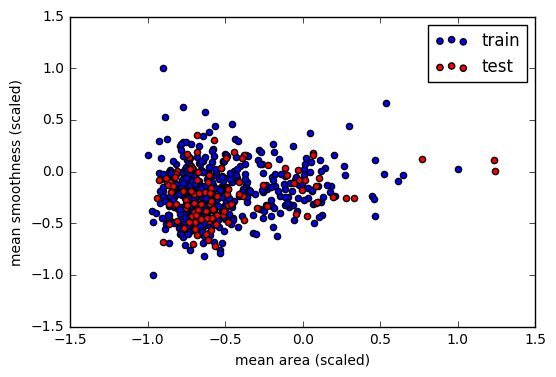

In [131]:
plt.scatter(X_train_mms[:,3], X_train_mms[:,4], c="blue", label="train")
plt.scatter(X_test_mms[:,3], X_test_mms[:,4], c="red", label="test")

plt.xlabel(data.feature_names[3] + " (scaled)")
plt.ylabel(data.feature_names[4] + " (scaled)")
plt.legend(loc="best")

# 51. 正規化

In [132]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

In [ ]:
# normalizer.fit(X_train)
# fitは必要なし
# なぜなら、全部の値を見ないと調整できないから
# 正規化はサンプルごとに行うのでfitいらいない

In [133]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [134]:
np.linalg.norm(X_train, axis=1)[:20]

array([  993.32232096,   989.08714862,   620.49067776,   814.95102559,
        1499.37136355,   617.17417851,  1438.23768814,   694.54924712,
         685.30447545,  1666.27012689,  1046.31605044,   594.13498999,
        1942.05100424,   596.68145504,  1152.61052954,   609.98361938,
         751.30221762,  1298.64640689,   578.01448673,  1638.2101345 ])

In [135]:
np.linalg.norm(X_train_norm, axis=1)[:20]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [141]:
clf.fit(X_train_norm, y_train)
print(clf.score(X_test_norm, y_test)) #かなり点数が悪い → 別の特徴量を同じ数値で割っているので

0.798245614035


# 52. PCA白色化

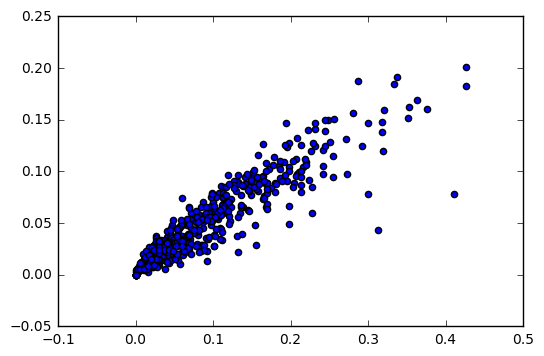

In [144]:
plt.scatter(data.data[:, 6], data.data[:, 7])

(0, 0.5)

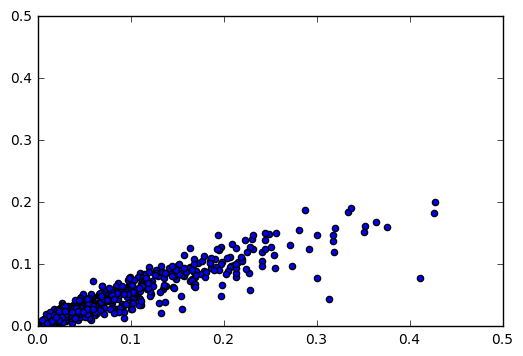

In [145]:
X = data.data[:, [6,7]]
y = data.target
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)

(-0.25, 0.25)

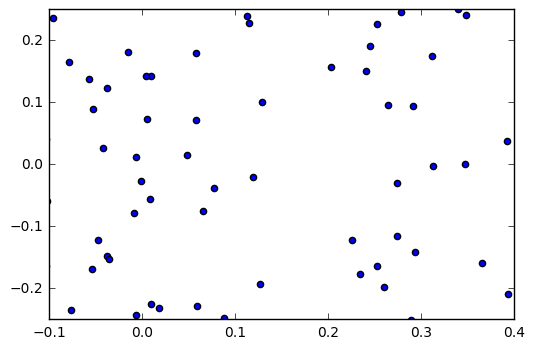

In [12]:
# PCAを適用
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.xlim(-0.1, 0.4)
plt.ylim(-0.25, 0.25)

In [150]:
X_new.mean(axis=0), X_new.std(axis=0)

(array([  1.65850540e-18,   3.39627760e-18]),
 array([ 0.08751603,  0.01371268]))

(-4, 10)

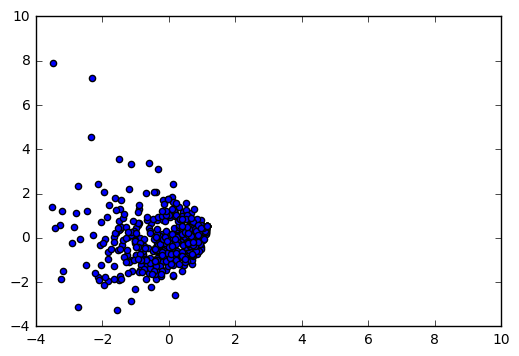

In [153]:
# PCA白色化は、これを平均0分散1にする
pca = PCA(whiten=True)
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:,0], X_new[:,1])
plt.xlim(-4, 10)
plt.ylim(-4, 10)

In [154]:
X_new.mean(axis=0), X_new.std(axis=0)

(array([ -9.17055925e-17,   2.48775810e-16]), array([ 1.,  1.]))

# 53. ZCA白色化

(-3, 3)

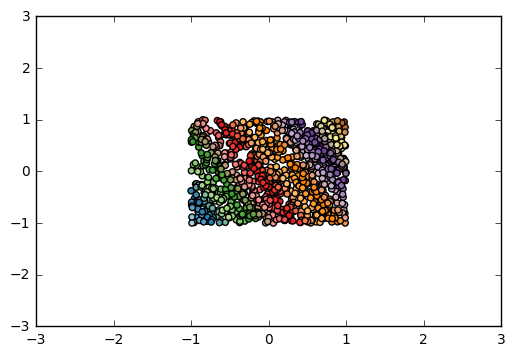

In [5]:
X = np.random.uniform(low=-1, high=1, size=(1000,2))
y = 2 * X[:, 0] + X[:, 1]
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

In [6]:
angle = np.pi/4

In [7]:
R = np.array([[np.sin(angle), -np.cos(angle)],
                        [np.cos(angle), np.sin(angle)]])
R

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

(-3, 3)

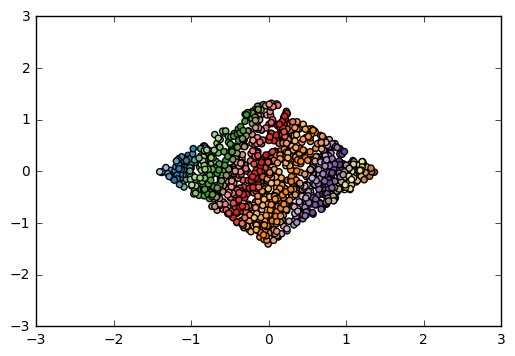

In [8]:
X_rot = X.dot(R)
plt.scatter(X_rot[:, 0], X_rot[:, 1], c=y)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

In [10]:
X = X_rot

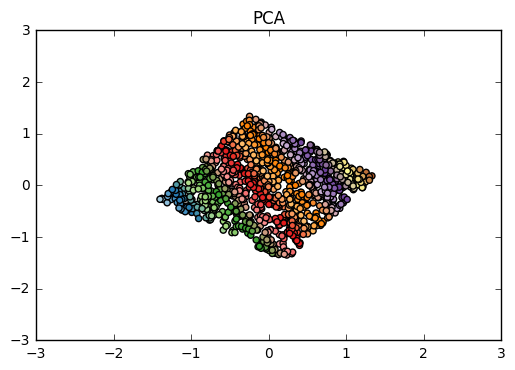

In [14]:
pca = PCA(whiten=False)
pca.fit(X)
X_new = pca.transform(X)

plt.scatter(X_new[:, 0], X_new[:, 1], c=y)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title("PCA")

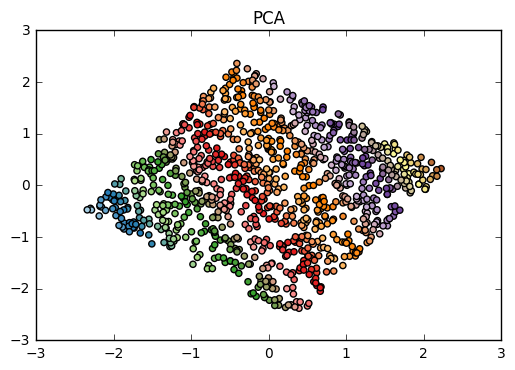

In [15]:
pca = PCA(whiten=True)
pca.fit(X)
X_new = pca.transform(X)

plt.scatter(X_new[:, 0], X_new[:, 1], c=y)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title("PCA")